<a href="https://colab.research.google.com/github/qwerty-123456-ui/image-processing-with-python/blob/master/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
% matplotlib inline
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

0.16.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Viewer requires Qt
  if __name__ == '__main__':


In [ ]:
from google.colab import files
files.upload()

Saving parrot.jpg to parrot (1).jpg


{'parrot.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01T\x01\xc5\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\

453 340 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


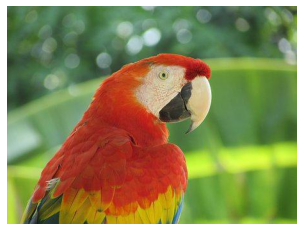

In [ ]:
im = Image.open("parrot.jpg")
print(im.width, im.height, im.mode, im.format, type(im))
plt.imshow(im)
plt.axis("off")
im.show()

In [11]:
from google.colab import files
files.upload()

Saving hill.jpg to hill.jpg


{'hill.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\xc0\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9

(960, 1280, 3) uint8 <class 'numpy.ndarray'>


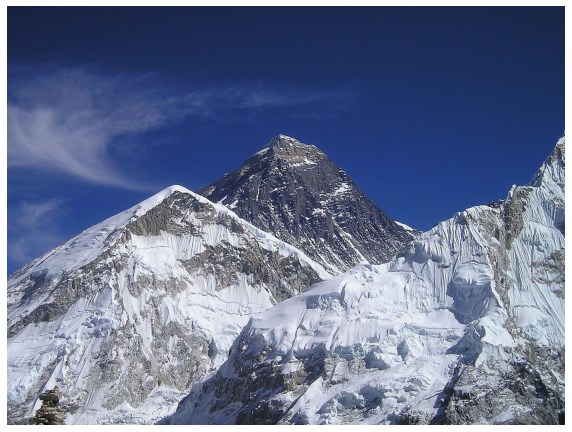

In [18]:
# Reading, saving, and displaying an image using Matplotlib
im = mpimg.imread("hill.jpg") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im)) # this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

In [36]:
from google.colab import files
files.upload()

Saving hill_dark.png to hill_dark.png


{'hill_dark.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00 \x00IDATx\x9c\xec\x9dwx\x14\xe5\xfa\xbf\xef\xd9\x9a\x1ez\x80\xd0{\xa4\x8bbGT\x8e"\xb6\xa3\xa2"\xa2\x1e\xb1\x1c{CE)a\x13\xba\x8aX@\x04AE\x01\xc5\x02*\xa2\x02\xa2\xd8h"\xbd\x83\xd4\x00!@z\xdbl\x99\xdf\x1f3Of\x12\x82\xa0\xc4\x9f\'~\xdf\xfb\xba\xb8\xb2;}g\x97\xf73O}5]\xd7u\x14\n\x85B\xa1\xa8b8\xfe\xee\x0bP(\x14\n\x85\xe2\xcf\xa0\x04L\xa1P(\x14U\x12%`\n\x85B\xa1\xa8\x92(\x01S(\x14\nE\x95D\t\x98B\xa1P(\xaa$J\xc0\x14\n\x85BQ%Q\x02\xa6P(\x14\x8a*\x89\x120\x85B\xa1PTI\x94\x80)\x14\n\x85\xa2J\xa2\x04L\xa1P(\x14U\x12%`\n\x85B\xa1\xa8\x92(\x01S(\x14\nE\x95D\t\x98B\xa1P(\xaa$J\xc0\x14\n\x85BQ%Q\x02\xa6P(\x14\x8a*\x89\x120\x85B\xa1PTI\x94\x80)\x14\n\x85\xa2J\xa2\x04L\xa1P(\x14U\x12%`\n\x85B\xa1\xa8\x92(\x01S(\x14\nE\x95D\t\x98B\xa1P(\xaa$J\xc0\x14\n\x85BQ%Q\x02\xa6P(\x14

(288, 432, 4) float32 <class 'numpy.ndarray'>


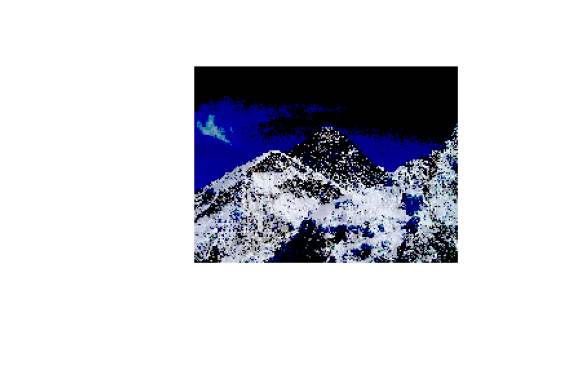

In [38]:
im = mpimg.imread("hill_dark.png")
print(im.shape, im.dtype, type(im))
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

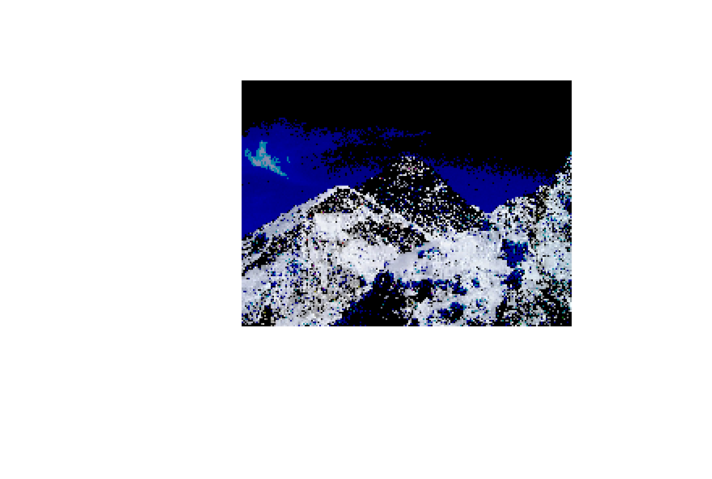

In [39]:
im1 = im
im1[im1 < 0.5] = 0 # make the image look darker
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("hill.png") # save the dark image
plt.close()
im = mpimg.imread("hill.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.imshow(im1)
plt.axis('off') # no axis ticks
plt.tight_layout()
plt.show()

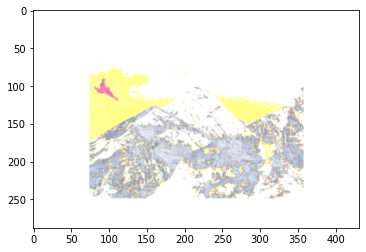

In [26]:
plt.imshow(im1)

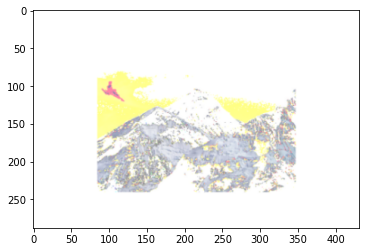

In [27]:
plt.imshow(im)